In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load Data

In [2]:
# url='https://drive.google.com/uc?export=download&id=1CI0Sj_OxG-MR23_yD1c7qcVWIKZokoKk'
url='https://drive.google.com/uc?export=download&id=12uHlVCLGMcwqUnh8AthviqGgq_qEsr23'
clean = pd.read_parquet(url)

In [3]:
# Copy data
df = clean.copy()
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TimeSincePrevSeconds,TransactionCountTotal,TransactionAmountBin,LoginAttemptsBin
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,0.728036,0.545455,1,1
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,0.516531,0.545455,2,1
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,0.480647,0.363636,1,1
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,0.662117,0.636364,1,1
4,0.006874,2023-10-16 17:51:24,0,1,2,0.435484,3,0.648276,0.0,0.492591,2024-11-04 08:06:39,0.211537,0.454545,1,1


In [4]:
df.describe()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TimeSincePrevSeconds,TransactionCountTotal,TransactionAmountBin,LoginAttemptsBin
count,2514.000000,2514,2514.000000,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514,2514.000000,2514.000000,2514.000000,2514.000000
mean,0.153717,2023-07-03 18:14:20.636435968,0.787987,21.284010,1.01074,0.429306,1.530231,0.377439,0.030430,0.336688,2024-11-04 08:09:22.405330176,0.494903,0.460331,1.294749,0.998409
min,0.002158,2023-01-02 16:00:06,0.000000,0.000000,0.00000,0.000000,0.000000,0.010345,0.000000,0.004353,2024-11-04 08:06:23,0.011165,0.090909,0.000000,0.000000
25%,0.043213,2023-03-29 16:26:04.249999872,1.000000,11.000000,0.00000,0.145161,0.250000,0.182759,0.000000,0.095324,2024-11-04 08:07:54.249999872,0.244710,0.272727,1.000000,1.000000
50%,0.110014,2023-07-06 04:57:02.500000,1.000000,21.000000,1.00000,0.435484,2.000000,0.351724,0.000000,0.311416,2024-11-04 08:09:21,0.489080,0.454545,1.000000,1.000000
75%,0.213328,2023-10-05 16:41:45,1.000000,32.000000,2.00000,0.661290,3.000000,0.520690,0.000000,0.506870,2024-11-04 08:10:53,0.749985,0.636364,2.000000,1.000000
max,0.708927,2024-01-01 18:21:50,2.000000,43.000000,3.00000,0.983871,4.000000,0.971966,1.000000,0.966017,2024-11-04 08:12:23,0.997033,1.000000,3.000000,2.000000
std,0.147835,NaN,0.437042,12.397534,0.83084,0.285942,1.150477,0.239787,0.148674,0.260169,NaN,0.289544,0.201938,0.841755,0.218516


# Clustering

## K Elbow Visualizer

In [5]:
# # Data for clustering
# features_for_clustering = [col for col in df.columns if df[col].dtype.kind in 'biufc']
# features_for_clustering += [col for col in df.columns if col.endswith('Bin')]


In [6]:
features_for_clustering = ['TransactionAmountBin', 'LoginAttemptsBin', 'TransactionCountTotal']

In [7]:
print(features_for_clustering)

['TransactionAmountBin', 'LoginAttemptsBin', 'TransactionCountTotal']


In [8]:
# Checking duplicates columns
features_for_clustering = list(dict.fromkeys(features_for_clustering))


In [9]:
X = df[features_for_clustering].values
model = KMeans(random_state=42)

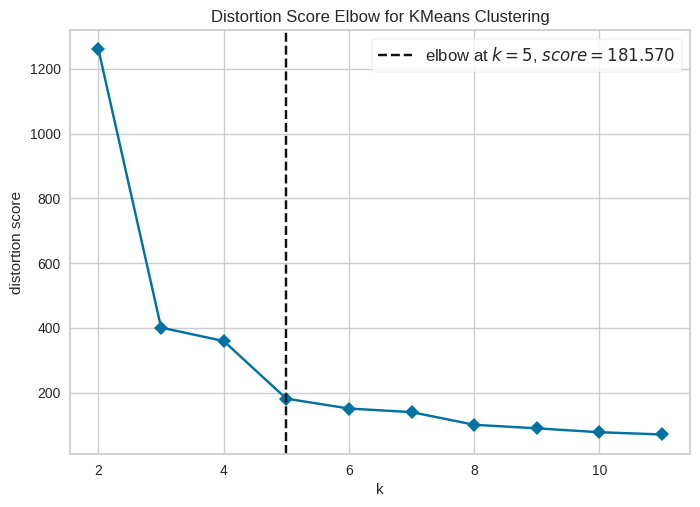

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
visualizer = KElbowVisualizer(model, k=(2,12), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.show()

## K-Means Clustering

In [11]:
# Modelling
K = 5
kmeans = KMeans(n_clusters=K, random_state=42)

In [12]:
# Result
labels = kmeans.fit_predict(X)
df['KMeansLabel'] = labels

In [13]:
# Silhouette score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score pada k={K}: {sil_score:.4f}")

Silhouette Score pada k=5: 0.7439


/tmp/ipython-input-4288842191.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['KMeansLabel'], palette='tab10')


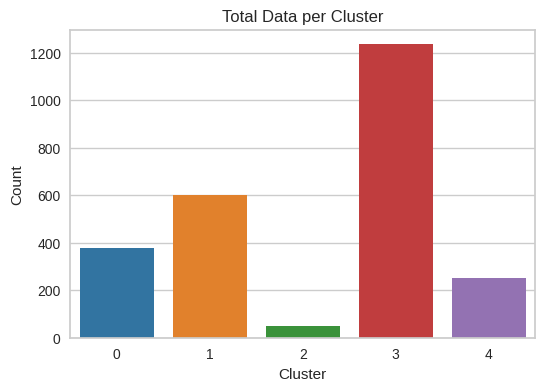

In [14]:
# Clustering result distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['KMeansLabel'], palette='tab10')
plt.title('Total Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [15]:
# Save model
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

## Create Model Using PCA

In [16]:
pca_2 = PCA(n_components=2, random_state=42)
X_pca_2 = pca_2.fit_transform(X)

In [17]:
PCA_2 = pd.DataFrame(X_pca_2, columns=['PCA1', 'PCA2'], index=df.index)

In [18]:
kmeans_pca = KMeans(n_clusters=K, random_state=42)

In [19]:
df["KMeansPCALabel"] = kmeans_pca.fit_predict(PCA_2)

In [20]:
print("PCA (2) shape: ", PCA_2.shape)
display(PCA_2.head())

PCA (2) shape:  (2514, 2)


,PCA1,PCA2
0,-0.295447,0.018164
1,0.704517,0.018535
2,-0.293930,-0.017534
3,-0.296206,0.036013
4,-0.294689,0.000315


In [21]:
# Save model
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# Clustering Interpretation

In [22]:
# Load Model
kmeans_model = joblib.load("model_clustering.h5")
pca_model = joblib.load("PCA_model_clustering.h5")

In [23]:
# Prediction using model_clustering.h5
df['Cluster_KMeans'] = kmeans_model.predict(X)

In [24]:
# Prediction using PCA
df["Cluster_KMeans_PCA"] = pca_model.predict(X_pca_2)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [25]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if not col.startswith("Cluster")]


In [26]:
# Aggregation for PCA-based clusters
agg_stats = df.groupby("Cluster_KMeans_PCA")[numeric_cols].agg(['mean', 'min', 'max'])


In [27]:
pd.set_option('display.max_columns', None)
print("=== DESKRIPSI NUMERIK PER CLUSTER (KMeans + PCA) ===")
display(agg_stats)

=== DESKRIPSI NUMERIK PER CLUSTER (KMeans + PCA) ===


TransactionAmount                     TransactionType      \
                                mean       min       max            mean min   
Cluster_KMeans_PCA                                                             
0                           0.273732  0.213331  0.363270        0.786486   0   
1                           0.156544  0.110186  0.213320        0.778502   0   
2                           0.089495  0.002158  0.348339        0.720930   0   
3                           0.048409  0.002158  0.110014        0.804858   0   
4                           0.497667  0.363530  0.708927        0.742063   0   

                         Location           Channel         CustomerAge       \
                   max       mean min max      mean min max        mean  min   
Cluster_KMeans_PCA                                                             
0                    2  21.027027   0  43  0.983784   0   3    0.407629  0.0   
1                    2  20.789902   0  43  0.991857   0   3    0.446753  0.0   
2                    1  19.558140   1  41  1.046512   0   2    0.438110  0.0   
3                    2  21.446154   0  43  1.021053   0   3    0.428967  0.0   
4                    2  22.365079   0  43  1.039683   0   3    0.418779  0.0   

                             CustomerOccupation         TransactionDuration  \
                         max               mean min max                mean   
Cluster_KMeans_PCA                                                            
0                   0.983871           1.554054   0   4            0.377564   
1                   0.983871           1.540717   0   4            0.373886   
2                   0.983871           1.465116   0   4            0.436568   
3                   0.983871           1.518219   0   4            0.377058   
4                   0.983871           1.539683   0   4            0.377690   

                                       LoginAttempts             \
                         min       max          mean   min  max   
Cluster_KMeans_PCA                                                
0                   0.010345  0.971966      0.008784  0.00  0.5   
1                   0.010345  0.971966      0.030537  0.00  1.0   
2                   0.010345  0.968966      0.866279  0.75  1.0   
3                   0.010345  0.971966      0.008704  0.00  0.5   
4                   0.010345  0.971966      0.025794  0.00  1.0   

                   AccountBalance                     TimeSincePrevSeconds  \
                             mean       min       max                 mean   
Cluster_KMeans_PCA                                                           
0                        0.330546  0.004353  0.966017             0.489289   
1                        0.326181  0.004353  0.966017             0.501655   
2                        0.351791  0.014640  0.966017             0.523431   
3                        0.343608  0.004353  0.966017             0.493941   
4                        0.334818  0.004353  0.966017             0.486536   

                                       TransactionCountTotal            \
                         min       max                  mean       min   
Cluster_KMeans_PCA                                                       
0                   0.011165  0.997033              0.478378  0.090909   
1                   0.011165  0.997033              0.448771  0.090909   
2                   0.049388  0.991681              0.448203  0.090909   
3                   0.011165  0.997033              0.461023  0.090909   
4                   0.019308  0.997033              0.460678  0.090909   

                             TransactionAmountBin         LoginAttemptsBin  \
                         max                 mean min max             mean   
Cluster_KMeans_PCA                                                           
0                   1.000000             0.000000   0   0         1.021622   
1                   1.000000         

In [31]:
cluster_summary = df.groupby("Cluster_KMeans_PCA")[numeric_cols].mean()

print("\n=== INTERPRETATION PER CLUSTER ===")
for cluster_id, row in cluster_summary.iterrows():
    print(f"\n🔹 Cluster {cluster_id}:")
    for feature in numeric_cols:
        mean_val = row[feature]
        global_mean = df[feature].mean()
        global_std = df[feature].std()
        level = (
            "tinggi" if mean_val > global_mean + global_std else
            "rendah" if mean_val < global_mean - global_std else
            "sedang"
        )
        print(f"  - {feature}: {level} (mean={mean_val:.3f})")


=== INTERPRETATION PER CLUSTER ===

🔹 Cluster 0:
  - TransactionAmount: sedang (mean=0.274)
  - TransactionType: sedang (mean=0.786)
  - Location: sedang (mean=21.027)
  - Channel: sedang (mean=0.984)
  - CustomerAge: sedang (mean=0.408)
  - CustomerOccupation: sedang (mean=1.554)
  - TransactionDuration: sedang (mean=0.378)
  - LoginAttempts: sedang (mean=0.009)
  - AccountBalance: sedang (mean=0.331)
  - TimeSincePrevSeconds: sedang (mean=0.489)
  - TransactionCountTotal: sedang (mean=0.478)
  - TransactionAmountBin: rendah (mean=0.000)
  - LoginAttemptsBin: sedang (mean=1.022)
  - KMeansLabel: rendah (mean=0.000)
  - KMeansPCALabel: rendah (mean=0.000)

🔹 Cluster 1:
  - TransactionAmount: sedang (mean=0.157)
  - TransactionType: sedang (mean=0.779)
  - Location: sedang (mean=20.790)
  - Channel: sedang (mean=0.992)
  - CustomerAge: sedang (mean=0.447)
  - CustomerOccupation: sedang (mean=1.541)
  - TransactionDuration: sedang (mean=0.374)
  - LoginAttempts: sedang (mean=0.031)
  - 

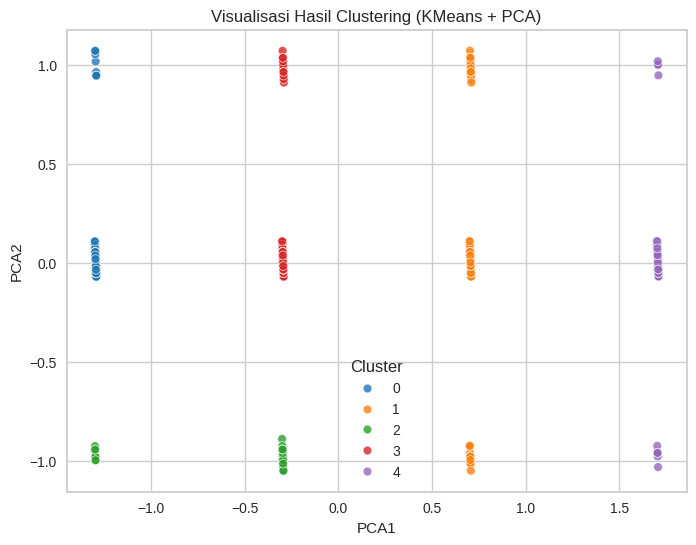

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2[:,0], y=X_pca_2[:,1],
                hue=df["Cluster_KMeans_PCA"],
                palette="tab10", s=40, alpha=0.8)
plt.title("Visualisasi Hasil Clustering (KMeans + PCA)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster", loc="best")
plt.show()

# Export Data

In [35]:
df.to_csv('data_clustering.csv', index=False)